In [1]:
import pandas as pd
import numpy as np
import os
import re
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
from jupyterthemes import jtplot
# Fondo oscuro
#jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
# Fondo blanco
jtplot.style(theme='grade3', context='notebook', ticks=True, grid=True)
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
base = pd.read_excel(r'C:\Users\JOSE\Desktop\Trabajo\BX\Capturas de Venezolanos\Base_final_colapsada.xlsx')
base

,Unnamed: 0,mes_año,Ubicación,Capturas,Migrantes,Capturas Migrantes,Tasa de temática migrante,Tasa capturas de migrantes,mes,año
0,286,1_2020,Amazonas,0,0,0,0.0,0.0,1,2020
1,352,2_2020,Amazonas,1,1,0,0.0,0.0,2,2020
2,421,3_2020,Amazonas,1,1,0,0.0,0.0,3,2020
3,494,4_2020,Amazonas,1,0,0,0.0,0.0,4,2020
4,570,5_2020,Amazonas,4,0,0,0.0,0.0,5,2020
...,...,...,...,...,...,...,...,...,...,...
1052,847,7_2022,"Villavicencio, Meta, Casanare, Amazonas, Guain...",1,0,0,0.0,0.0,7,2022
1053,950,8_2022,"Villavicencio, Meta, Casanare, Amazonas, Guain...",2,0,0,0.0,0.0,8,2022
1054,1056,9_2022,"Villavicencio, Meta, Casanare, Amazonas, Guain...",3,2,0,0.0,0.0,9,2022
1055,108,10_2022,"Villavicencio, Meta, Casanare, Amazonas, Guain...",2,0,0,0.0,0.0,10,2022


In [3]:
base_2022 = base[base['año'] == 2022]
base_2022

,Unnamed: 0,mes_año,Ubicación,Capturas,Migrantes,Capturas Migrantes,Tasa de temática migrante,Tasa capturas de migrantes,mes,año
24,300,1_2022,Amazonas,14,1,1,1.0,0.071429,1,2022
25,368,2_2022,Amazonas,6,2,1,0.5,0.166667,2,2022
26,440,3_2022,Amazonas,15,1,1,1.0,0.066667,3,2022
27,515,4_2022,Amazonas,7,0,0,0.0,0.000000,4,2022
28,602,5_2022,Amazonas,9,0,0,0.0,0.000000,5,2022
...,...,...,...,...,...,...,...,...,...,...
1052,847,7_2022,"Villavicencio, Meta, Casanare, Amazonas, Guain...",1,0,0,0.0,0.000000,7,2022
1053,950,8_2022,"Villavicencio, Meta, Casanare, Amazonas, Guain...",2,0,0,0.0,0.000000,8,2022
1054,1056,9_2022,"Villavicencio, Meta, Casanare, Amazonas, Guain...",3,2,0,0.0,0.000000,9,2022
1055,108,10_2022,"Villavicencio, Meta, Casanare, Amazonas, Guain...",2,0,0,0.0,0.000000,10,2022


In [4]:
data_grafico_1 = base_2022.sort_values(by=['Capturas Migrantes'], ascending=False)
data_grafico_1 = data_grafico_1[data_grafico_1['Ubicación'].isin(['Tunja', 'Bucaramanga', 'Bogotá', 'Vichada', 'Casanare'])]
data_grafico_1 = data_grafico_1.sort_values(by=['Ubicación','mes'], ascending=True)
data_grafico_1 = data_grafico_1.groupby(['Ubicación']).sum()
data_grafico_1 = data_grafico_1.sort_values(by=['Capturas Migrantes'], ascending=False)
data_grafico_1

,Unnamed: 0,Capturas,Migrantes,Capturas Migrantes,Tasa de temática migrante,Tasa capturas de migrantes,mes,año
Ubicación,,,,,,,,
Bucaramanga,5236,724,40,39,7.909091,0.386474,63,18198
Tunja,3148,719,27,15,1.090909,0.075000,45,10110
Bogotá,5878,583,12,12,6.000000,0.208411,66,22242
Casanare,5995,128,3,3,2.000000,0.086738,66,22242
Vichada,6399,45,4,2,0.666667,0.500000,66,22242


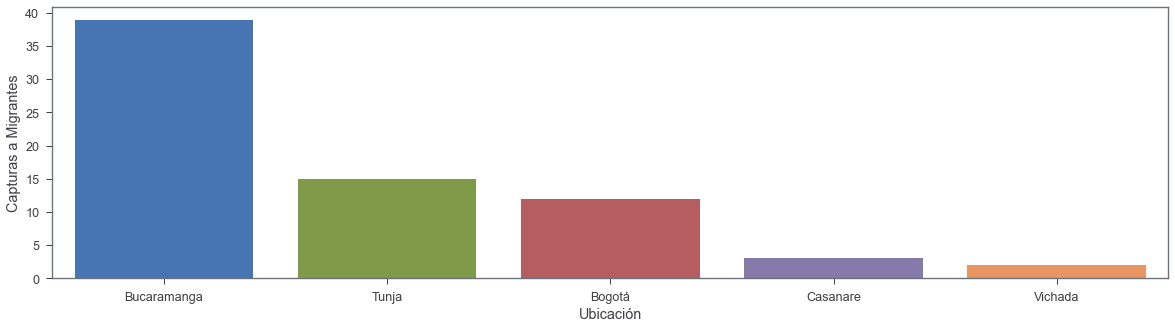

In [5]:
plt.figure(figsize=(20,5))
lines = sns.barplot(data=data_grafico_1, x=data_grafico_1.index, y="Capturas Migrantes")
#sns.move_legend(lines, "upper left", bbox_to_anchor=(1, 1))
#trat = sns.scatterplot(x="Treated", y= "y_coord", data=base_nodos)
#ax2 = ax.twinx()
#cont = sns.scatterplot(x="Control", y= "y_coord", data=base_nodos, ax=ax2)
#plt.axvline(x = 0, color = 'b', label = '')
# add label to the axis and label to the plot
#for i in range(len(Short_name)):
    #plt.annotate(Short_name[i], (base_nodos['Treated'][i]-0.15, base_nodos['y_coord'][i]-0.01) )
   # plt.annotate(Short_name[i], (base_nodos['Control'][i]+0.05, base_nodos['y_coord'][i]-0.01) )
lines.set(xlabel = "Ubicación", ylabel = 'Capturas a Migrantes')
#cont.set( ylabel = '')
plt.grid(False)
#ax2.grid(False)

In [6]:
data_grafico_1 = base_2022.sort_values(by=['Capturas Migrantes'], ascending=False)
data_grafico_1 = data_grafico_1[data_grafico_1['Ubicación'].isin(['Tunja', 'Bucaramanga', 'Bogotá', 'Vichada', 'Casanare'])]
data_grafico_1 = data_grafico_1.sort_values(by=['Ubicación','mes'], ascending=True)
data_grafico_1 = data_grafico_1.groupby(['Ubicación']).sum()
data_grafico_1 = data_grafico_1.sort_values(by=['Capturas Migrantes'], ascending=False)
data_grafico_1['Participación migrantes en crimen'] = data_grafico_1['Capturas Migrantes']/data_grafico_1['Capturas']
data_grafico_1 = data_grafico_1.sort_values(by=['Participación migrantes en crimen'], ascending=False)
data_grafico_1

,Unnamed: 0,Capturas,Migrantes,Capturas Migrantes,Tasa de temática migrante,Tasa capturas de migrantes,mes,año,Participación migrantes en crimen
Ubicación,,,,,,,,,
Bucaramanga,5236,724,40,39,7.909091,0.386474,63,18198,0.053867
Vichada,6399,45,4,2,0.666667,0.500000,66,22242,0.044444
Casanare,5995,128,3,3,2.000000,0.086738,66,22242,0.023438
Tunja,3148,719,27,15,1.090909,0.075000,45,10110,0.020862
Bogotá,5878,583,12,12,6.000000,0.208411,66,22242,0.020583


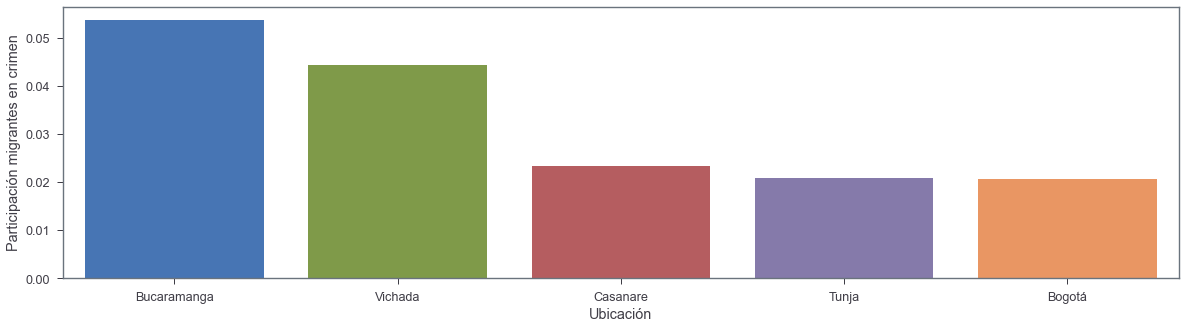

In [7]:
plt.figure(figsize=(20,5))
lines = sns.barplot(data=data_grafico_1, x=data_grafico_1.index, y="Participación migrantes en crimen")
#sns.move_legend(lines, "upper left", bbox_to_anchor=(1, 1))
#trat = sns.scatterplot(x="Treated", y= "y_coord", data=base_nodos)
#ax2 = ax.twinx()
#cont = sns.scatterplot(x="Control", y= "y_coord", data=base_nodos, ax=ax2)
#plt.axvline(x = 0, color = 'b', label = '')
# add label to the axis and label to the plot
#for i in range(len(Short_name)):
    #plt.annotate(Short_name[i], (base_nodos['Treated'][i]-0.15, base_nodos['y_coord'][i]-0.01) )
   # plt.annotate(Short_name[i], (base_nodos['Control'][i]+0.05, base_nodos['y_coord'][i]-0.01) )
lines.set(xlabel = "Ubicación", ylabel = 'Participación migrantes en crimen')
#cont.set( ylabel = '')
plt.grid(False)
#ax2.grid(False)

In [8]:
data_grafico_1 = base_2022[base_2022['Ubicación'].isin(['Tunja', 'Bucaramanga', 'Bogotá', 'Vichada', 'Casanare'])]


[Text(0.5, 0, 'mes'), Text(0, 0.5, 'Capturas Migrantes')]

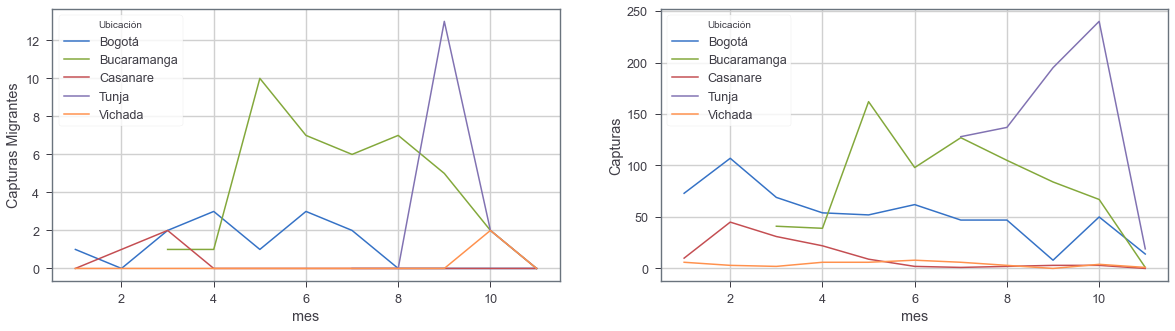

In [9]:
figure, axes = plt.subplots(1, 2, sharex=True, figsize=(20,5))
lines = sns.lineplot(ax=axes[0],data=data_grafico_1, x="mes", y="Capturas Migrantes", hue="Ubicación")
lines_2 = sns.lineplot(ax=axes[1],data=data_grafico_1, x="mes", y="Capturas", hue="Ubicación")
#sns.move_legend(lines, "upper left", bbox_to_anchor=(1, 1))
#trat = sns.scatterplot(x="Treated", y= "y_coord", data=base_nodos)
#ax2 = ax.twinx()
#cont = sns.scatterplot(x="Control", y= "y_coord", data=base_nodos, ax=ax2)
#plt.axvline(x = 0, color = 'b', label = '')
# add label to the axis and label to the plot
#for i in range(len(Short_name)):
    #plt.annotate(Short_name[i], (base_nodos['Treated'][i]-0.15, base_nodos['y_coord'][i]-0.01) )
   # plt.annotate(Short_name[i], (base_nodos['Control'][i]+0.05, base_nodos['y_coord'][i]-0.01) )
lines.set(xlabel = "mes", ylabel = 'Capturas Migrantes')
#cont.set( ylabel = '')
#figure.grid(False)
#ax2.grid(False)

In [10]:
data_grafico_1 = base_2022.sort_values(by=['Capturas Migrantes'], ascending=False)
data_grafico_1 = data_grafico_1[data_grafico_1['Ubicación'].isin(['Tunja', 'Bucaramanga', 'Bogotá', 'Vichada', 'Casanare'])]
print("Promedio Nacional 2022: ")
data_grafico_1['Tasa capturas de migrantes'].mean()

Promedio Nacional 2022: 


0.026736652226995956

In [12]:
pd.unique(base_2022['Ubicación'])

array(['Amazonas', 'Antioquia', 'Arauca', 'Atlantico',
       'Barranquilla, Cartagena, Santa Marta, Atlántico, Bolívar, Magdalena, La Guajira, Sucre, San Andrés Y Providencia, Cesar',
       'Bogotá', 'Bogotá, Boyacá, Cundinamarca', 'Bolivar', 'Boyacá',
       'Bucaramanga',
       'Bucaramanga, Cúcuta, Santander, Norte de Santander, Arauca, Magdalena Medio',
       'Caldas', 'Cali',
       'Cali, Valle del Cauca, Cauca, Nariño, Buenaventura, Tumaco',
       'Caqueta', 'Cartagena', 'Casanare', 'Cauca', 'Cesar', 'Choco',
       'Cordoba', 'Cúcuta', 'Cundinamarca', 'Guainia', 'Guajira', 'Huila',
       'Ibague', 'Ibagué, Tolima, Huila, Caquetá, Putumayo', 'Magdalena',
       'Magdalena Medio', 'Manizales', 'Medellín', 'Meta', 'Monteria',
       'Nacional', 'Nariño', 'Norte de Santander', 'Pasto', 'Pereira',
       'Pereira, Risaralda, Caldas, Quindío', 'Popayan', 'Putumayo',
       'Quindio', 'Risaralda', 'San Andrés y Providencia', 'Santa Marta',
       'Santander', 'Sucre', 'Tolima', 

In [31]:
data_grafico_1 = base[base['Ubicación'].isin(['Antioquia', 'Atlantico', 'Bogotá', 'Vichada', 'Casanare','Caldas','Caqueta','Casanare',
                                                       'Cauca', 'Cesar','Choco','Cordoba','Cundinamarca','Guainia','Guajira','Huila','Magdalena Medio',
                                                       'Nariño','Norte de Santander','San Andrés y Providencia','Vaupes','Vichada','Valle del Cauca','Sucre',
                                                       'Putumayo','Huila','Meta','Arauca','Quindío','Risaralda','Santander','Tolima','Guaviare','Bolivar','Boyacá',
                                             'Amazonas'])]
pd.unique(data_grafico_1['Ubicación'])

array(['Amazonas', 'Antioquia', 'Arauca', 'Atlantico', 'Bogotá',
       'Bolivar', 'Boyacá', 'Caldas', 'Caqueta', 'Casanare', 'Cauca',
       'Cesar', 'Choco', 'Cordoba', 'Cundinamarca', 'Guainia', 'Guajira',
       'Huila', 'Magdalena Medio', 'Meta', 'Nariño', 'Norte de Santander',
       'Putumayo', 'Risaralda', 'San Andrés y Providencia', 'Santander',
       'Sucre', 'Tolima', 'Valle del Cauca', 'Vaupes', 'Vichada'],
      dtype=object)

In [32]:
data_grafico_1 = data_grafico_1.groupby(['Ubicación']).sum()
data_grafico_1

,Unnamed: 0,Capturas,Migrantes,Capturas Migrantes,Tasa de temática migrante,Tasa capturas de migrantes,mes,año
Ubicación,,,,,,,,
Amazonas,17222,212,14,8,7.500000,0.876984,222,70734
Antioquia,6069,488,1,0,0.000000,0.000000,78,24263
Arauca,11927,188,10,3,3.000000,0.171221,167,50534
Atlantico,15166,207,1,0,0.000000,0.000000,207,60634
Bogotá,8073,824,18,17,9.666667,0.366139,116,32347
Bolivar,9533,395,1,0,0.000000,0.000000,129,36389
Boyacá,6293,511,5,3,2.500000,0.099362,99,28305
Caldas,6311,184,3,0,0.000000,0.000000,89,26284
Caqueta,10214,289,4,0,0.000000,0.000000,134,38410


In [34]:
data_grafico_1.to_excel('Participación_migrantes_crimen.xlsx')